--- 1. Loading the Dataset ---
First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null  

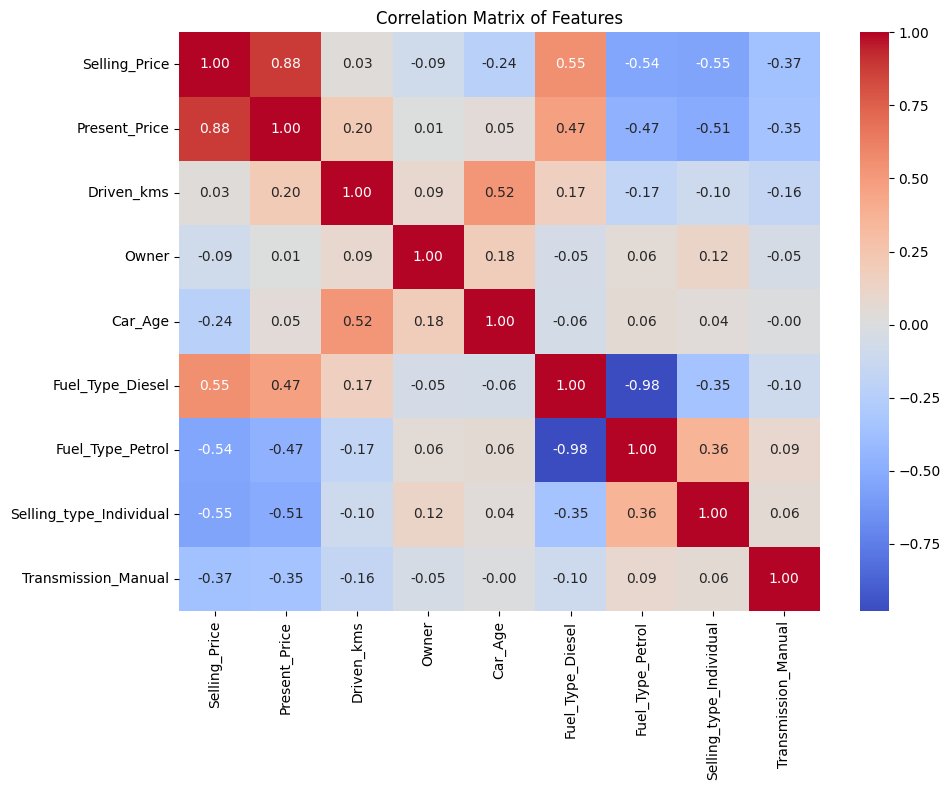

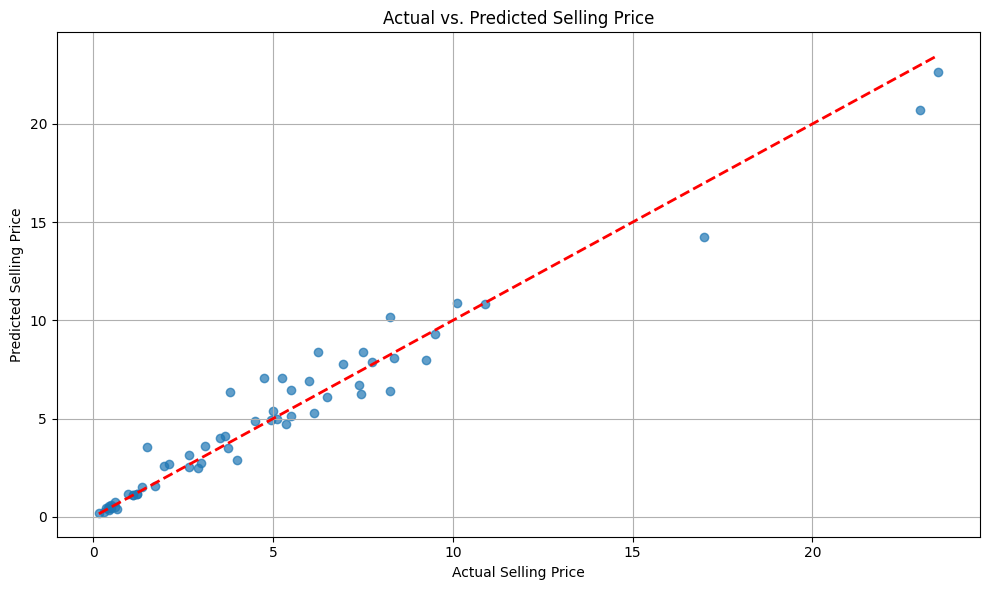

Actual vs. Predicted Selling Price plot saved as 'actual_vs_predicted_selling_price.png'.
----------------------------------------

--- 7. Feature Importance ---

Feature Importances:
Present_Price              0.881166
Car_Age                    0.059495
Driven_kms                 0.040265
Transmission_Manual        0.009646
Fuel_Type_Diesel           0.004339
Fuel_Type_Petrol           0.002564
Selling_type_Individual    0.002155
Owner                      0.000370
dtype: float64


<ipython-input-1-187671466>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


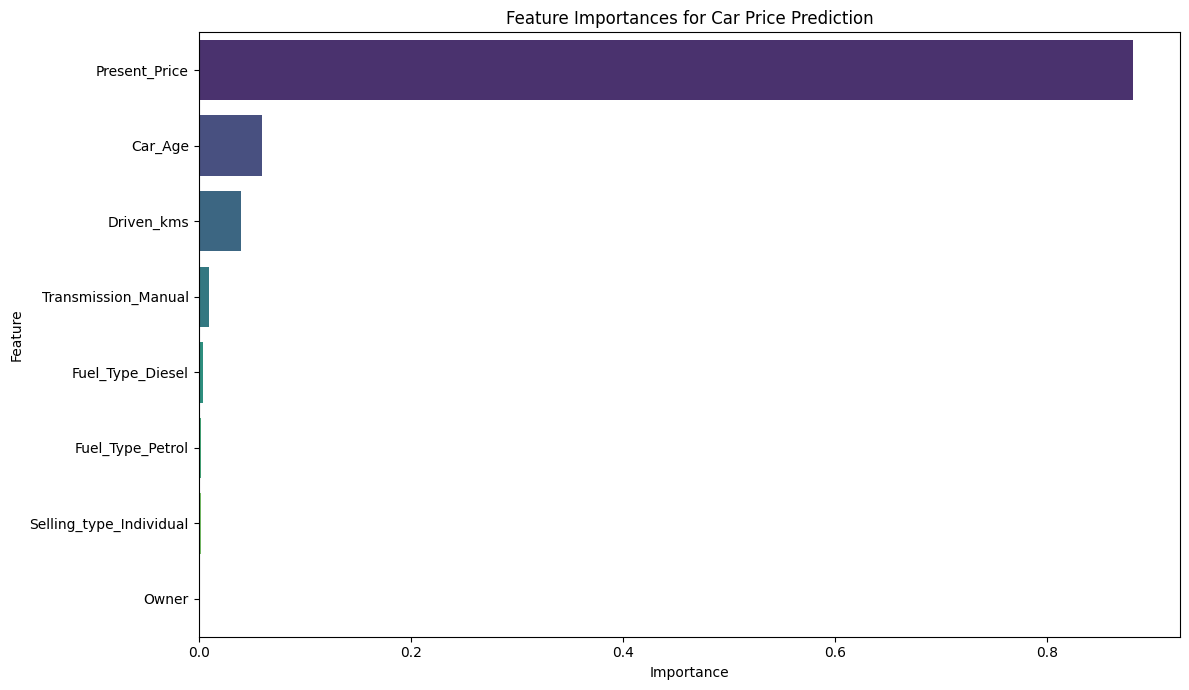

Feature importances plot saved as 'feature_importances.png'.
----------------------------------------

Project execution complete!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- 1. Load the Dataset ---
print("--- 1. Loading the Dataset ---")
df = pd.read_csv('car data.csv')
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("-" * 40 + "\n")

# --- 2. Data Preprocessing and Feature Engineering ---
print("--- 2. Data Preprocessing and Feature Engineering ---")

# Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Calculate the current year (assuming the current year is 2025 as per previous turns)
current_year = 2025

# Create a new feature 'Car_Age'
df['Car_Age'] = current_year - df['Year']

# Drop the original 'Year' column and 'Car_Name' column as they are not needed for the model
# 'Car_Name' is too specific and generally not useful for a generalized price prediction model
df = df.drop(['Year', 'Car_Name'], axis=1)

print("\nDataFrame after adding 'Car_Age' and dropping 'Year' and 'Car_Name':")
print(df.head())

# Get unique values for categorical features to understand their categories
print("\nUnique values for 'Fuel_Type':", df['Fuel_Type'].unique())
print("Unique values for 'Selling_type':", df['Selling_type'].unique())
print("Unique values for 'Transmission':", df['Transmission'].unique())

# Apply one-hot encoding to categorical features
# drop_first=True helps to avoid multicollinearity
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

print("\nDataFrame after one-hot encoding:")
print(df.head())
print("-" * 40 + "\n")

# --- 3. Exploratory Data Analysis (Optional but Recommended) ---
# This part is not strictly required by the prompt, but it's good practice for understanding data
print("--- 3. Exploratory Data Analysis ---")
print("Statistical summary of numerical features:")
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
print("\nCorrelation matrix saved as 'correlation_matrix.png'.")
print("-" * 40 + "\n")

# --- 4. Model Training ---
print("--- 4. Model Training ---")

# Define features (X) and target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

# Initialize and train the Random Forest Regressor model
# n_estimators: The number of trees in the forest.
# random_state: Controls the randomness of the estimator.
model = RandomForestRegressor(n_estimators=100, random_state=42)
print("\nTraining the RandomForestRegressor model...")
model.fit(X_train, y_train)
print("Model training complete.")
print("-" * 40 + "\n")

# --- 5. Model Evaluation ---
print("--- 5. Model Evaluation ---")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("-" * 40 + "\n")

# --- 6. Visualize Results ---
print("--- 6. Visualizing Results ---")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
# Plotting the ideal line where actual equals predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price")
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted_selling_price.png')
plt.show() # Display the plot

print("Actual vs. Predicted Selling Price plot saved as 'actual_vs_predicted_selling_price.png'.")
print("-" * 40 + "\n")

# --- 7. Feature Importance (Optional) ---
# This helps to understand which features contributed most to the predictions
print("--- 7. Feature Importance ---")
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances for Car Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.show()
print("Feature importances plot saved as 'feature_importances.png'.")
print("-" * 40 + "\n")

print("Project execution complete!")